<a href="https://colab.research.google.com/github/SoundaryaSarathi/Machine-learning/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


In [9]:


class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.n_iters):
            for j, x in enumerate(X):
                #enumerate returns the index and the object at that index
                op=np.dot(x, self.weights) + self.bias 
                y_predicted = self.activation_func(op)  #update the weigts only if its misclassified
                update=self.lr * (y[j] - y_predicted) #update is zero if y[j]==y_predicted else it is 1
                self.weights += update * x
                self.bias += update
 
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    # Here we are using unit step function
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)
               

       


predictions,actual:
[0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1]
[0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1]
Perceptron classification accuracy 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


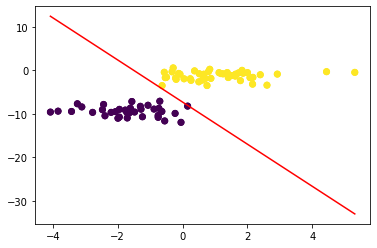

In [10]:
if __name__ == "__main__":
   
        def accuracy(y_true, y_pred):
            accuracy = np.sum(y_true == y_pred) / len(y_true)
            return accuracy
        
        X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=2)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
        fig = plt.figure()
        plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
        
        
        #creating a model
        p = Perceptron(learning_rate=0.01, n_iters=1000)
        p.fit(X_train, y_train)
        
        #now we created the model (i.e. ) using the training data i found some weighs and biases
        #we now test the accuracy of the model using the test data
        
        predictions = p.predict(X_test)
        print("predictions,actual:")
        print(predictions)
        print(y_test)
        print("Perceptron classification accuracy", accuracy(y_test, predictions))
        
        #plotting
       
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
        
        #plotting the hyperplane
        xmin = np.amin(X_train[:, 0])
        xmax= np.amax(X_train[:, 0])
        xm=np.linspace(xmin,xmax,100)
        ym=(-p.weights[0] * xm- p.bias) / p.weights[1]
        plt.plot(xm,ym,'-r')
        plt.show()
       
       
        
        
        
        
        
    